# Interoperability with cupy
[cupy](https://cupy.dev) is another GPU-acceleration library that allows processing images. To make the best out of GPUs, we demonstrate here how cupy and clesperanto can be combined.

In [1]:
import numpy as np
import cupy as cp
import cupyx.scipy.ndimage as ndi
import pyclesperanto_prototype as cle
from skimage.io import imread

Let's start with a numpy-array and send it to cupy.

In [2]:
np_data = imread('../../data/Haase_MRT_tfl3d1.tif')
np_data.shape

(120, 160, 160)

In [3]:
cp_data = cp.asarray(np_data)
cp_data.shape

(120, 160, 160)

Next, we can apply a filter to the image in cupy.

In [4]:
cp_filtered = ndi.gaussian_filter(cp_data, sigma=5)
cp_filtered.shape

(120, 160, 160)

Just as an example, we can now threshold the image using `threshold_otsu` which is provided by clesperanto but not by cupy.

In [5]:
cl_binary = cle.threshold_otsu(cp_filtered)
cl_binary.shape

(120, 160, 160)

clesperanto also comes with a function for visualizing data

0.0
1.0


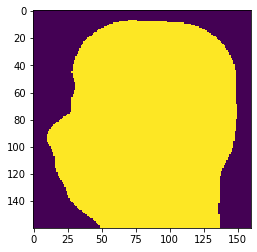

In [6]:
print(cl_binary.min())
print(cl_binary.max())
cle.imshow(cl_binary)

In order to get the image back to cupy, we need to do this:

In [7]:
cu_binary = cp.asarray(cl_binary)
cu_edges = ndi.sobel(cu_binary, output=float)
cu_edges.shape

(120, 160, 160)

A cupy-image can also be visualized using clesperantos imshow:

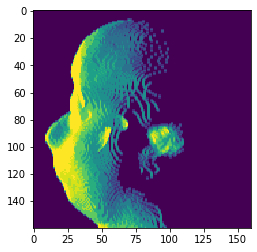

In [8]:
cle.imshow(cu_edges)

## Final remark
Keep in mind that when using clesperanto and cupy in combination, data is transferred multiple times between GPU and CPU. Try to minimize data transfer and run as many operations as possible in a row using the same library.